In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

# Load dataset

In [2]:
data = pd.read_csv("artificial_dataset.csv")
data = data.drop("Unnamed: 0", axis=1)
data

,0,1,2,3,4,5,6,7,8,9,label
0,3,3,3,3,3,3,3,3,3,3,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1,3,2,1,0,3,2,1,0,0,0,[0. 0. 0. 3. 0. 0. 0. 0. 0. 0.]
2,3,3,3,3,3,3,3,3,3,3,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3,3,3,3,3,3,3,3,3,3,3,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
4,1,2,3,3,3,3,3,3,3,3,[0. 0. 0. 0. 0. 0. 0. 0. 2. 0.]
...,...,...,...,...,...,...,...,...,...,...,...
99995,1,1,1,1,2,3,0,1,2,3,[0. 1. 0. 0. 0. 0. 0. 3. 0. 0.]
99996,3,2,1,0,3,3,3,3,3,3,[0. 0. 0. 0. 0. 0. 3. 0. 0. 0.]
99997,0,0,0,0,0,0,0,0,0,0,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
99998,1,3,3,3,3,3,3,3,3,3,[0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]


In [3]:
# parse label's str to bit list
y=data['label']  # Labels
y_parse = []
for n,i in enumerate(y):
    y_parse.append([float(j) for j in i.strip("[").strip("]").strip("\n").strip(".").split(" ")])
    
nzero_error = 0    
for row in y_parse:
    if all([r<0.1 for r in row]):
        nzero_error += 1
        
print("Data points:\t", len(y_parse))
print("No errors in :\t", nzero_error)
nkeep = int(((len(y_parse)-nzero_error)/4))
print("0 error to keep(1/4 with error):\t", nkeep)

Data points:	 100000
No errors in :	 66948
0 error to keep(1/4 with error):	 8263


In [4]:
# drop all zero's data
dr = []
yy = []
kept_0 = 0
for n,row in enumerate(y_parse):
    if all([r<0.1 for r in row]):
        #if kept_0 < nkeep:
        #    yy.append([int(r) for r in row])
        #    kept_0 += 1
        #else:
        dr.append(n)
    else:
        yy.append([int(r) for r in row])
        #yy.append(np.sum([bit*2**h for h, bit in enumerate(row)]))
data = data.drop(data.index[dr])

In [5]:
# shuffling data
data["label"] = yy
data = data.sample(frac=1)
print("Data head")
print(data.head())
X, Y = data.iloc[:,:-1], data["label"]

# converting lists to array
y = np.zeros((len(Y), 10))
for n,i in enumerate(Y):
    y[n,:] = i

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print("\n train data:", len(X_train))
print(" test data:", len(X_test))

Data head
       0  1  2  3  4  5  6  7  8  9                           label
64146  3  0  1  2  3  0  1  2  3  0  [0, 4, 0, 0, 0, 0, 0, 0, 0, 0]
354    3  2  1  0  3  3  3  3  3  3  [0, 0, 0, 0, 0, 3, 0, 0, 0, 0]
12081  1  2  3  0  1  2  3  0  0  0  [0, 0, 2, 0, 0, 0, 0, 0, 0, 0]
88221  1  2  3  0  1  2  3  0  1  2  [2, 0, 0, 0, 0, 0, 0, 0, 0, 0]
99172  1  0  0  0  0  0  0  0  0  0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

 train data: 23136
 test data: 9916


In [6]:
# normalization layer
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))

In [168]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error [MSE]')
    plt.legend()
    plt.grid(True)

# DeepNeuralNetwork

In [203]:
def build_and_compile_model(norm):
    model = keras.Sequential([
        norm,
        layers.Dense(64, activation='relu'),
        layers.Dense(20, activation='relu'),
        layers.Dense(10, activation='relu'),
        layers.Dense(10, activation='relu')
    ])
    model.compile(loss='mse',
                  optimizer=tf.keras.optimizers.Nadam())
                  #optimizer=tf.keras.optimizers.Adam(0.002))
    return model

In [204]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 10)               21        
 n)                                                              
                                                                 
 dense_93 (Dense)            (None, 64)                704       
                                                                 
 dense_94 (Dense)            (None, 20)                1300      
                                                                 
 dense_95 (Dense)            (None, 10)                210       
                                                                 
 dense_96 (Dense)            (None, 10)                110       
                                                                 
Total params: 2,345
Trainable params: 2,324
Non-trainable params: 21
__________________________________________________

In [205]:
%%time
history = dnn_model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=0, epochs=200,workers=16)

Epoch 1/200
579/579 [==============================] - 6s 8ms/step - loss: 0.6431 - val_loss: 0.5384
Epoch 2/200
579/579 [==============================] - 5s 8ms/step - loss: 0.4987 - val_loss: 0.4836
Epoch 3/200
579/579 [==============================] - 5s 8ms/step - loss: 0.4473 - val_loss: 0.4336
Epoch 4/200
579/579 [==============================] - 5s 8ms/step - loss: 0.4055 - val_loss: 0.3963
Epoch 5/200
579/579 [==============================] - 5s 8ms/step - loss: 0.3829 - val_loss: 0.3882
Epoch 6/200
579/579 [==============================] - 5s 8ms/step - loss: 0.3744 - val_loss: 0.3818
Epoch 7/200
579/579 [==============================] - 5s 8ms/step - loss: 0.3693 - val_loss: 0.3803
Epoch 8/200
579/579 [==============================] - 5s 9ms/step - loss: 0.3647 - val_loss: 0.3764
Epoch 9/200
579/579 [==============================] - 5s 8ms/step - loss: 0.3620 - val_loss: 0.3755
Epoch 10/200
579/579 [==============================] - 5s 8ms/step - loss: 0.3592 - val_lo

579/579 [==============================] - 5s 8ms/step - loss: 0.3202 - val_loss: 0.3534
Epoch 82/200
579/579 [==============================] - 5s 8ms/step - loss: 0.3199 - val_loss: 0.3512
Epoch 83/200
579/579 [==============================] - 5s 8ms/step - loss: 0.3195 - val_loss: 0.3517
Epoch 84/200
579/579 [==============================] - 5s 8ms/step - loss: 0.3191 - val_loss: 0.3514
Epoch 85/200
579/579 [==============================] - 5s 8ms/step - loss: 0.3194 - val_loss: 0.3473
Epoch 86/200
579/579 [==============================] - 5s 8ms/step - loss: 0.3179 - val_loss: 0.3509
Epoch 87/200
579/579 [==============================] - 5s 8ms/step - loss: 0.3185 - val_loss: 0.3522
Epoch 88/200
579/579 [==============================] - 4s 8ms/step - loss: 0.3184 - val_loss: 0.3497
Epoch 89/200
579/579 [==============================] - 5s 8ms/step - loss: 0.3174 - val_loss: 0.3498
Epoch 90/200
579/579 [==============================] - 5s 8ms/step - loss: 0.3182 - val_loss: 

Epoch 161/200
579/579 [==============================] - 5s 8ms/step - loss: 0.2985 - val_loss: 0.3315
Epoch 162/200
579/579 [==============================] - 5s 9ms/step - loss: 0.2982 - val_loss: 0.3323
Epoch 163/200
579/579 [==============================] - 5s 9ms/step - loss: 0.2986 - val_loss: 0.3306
Epoch 164/200
579/579 [==============================] - 5s 9ms/step - loss: 0.2983 - val_loss: 0.3327
Epoch 165/200
579/579 [==============================] - 5s 8ms/step - loss: 0.2982 - val_loss: 0.3339
Epoch 166/200
579/579 [==============================] - 4s 8ms/step - loss: 0.2980 - val_loss: 0.3304
Epoch 167/200
579/579 [==============================] - 4s 8ms/step - loss: 0.2979 - val_loss: 0.3340
Epoch 168/200
579/579 [==============================] - 4s 8ms/step - loss: 0.2979 - val_loss: 0.3324
Epoch 169/200
579/579 [==============================] - 5s 8ms/step - loss: 0.2980 - val_loss: 0.3323
Epoch 170/200
579/579 [==============================] - 5s 9ms/step - lo

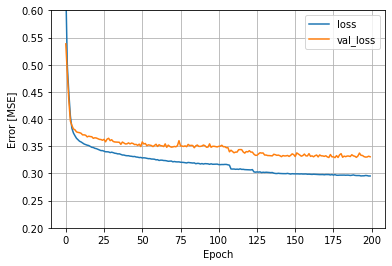

In [207]:
plot_loss(history)
plt.ylim(0.2,0.6)
plt.savefig("dnn_loss.pdf",format="pdf")

In [208]:
pred = dnn_model.predict(X_test)

In [209]:
# ricategorise predictions
cat_pred = np.zeros_like(pred)
correct = 0
for n,p in enumerate(pred):
    if(all([int(i) for i in p] ==  y_test[n])):
        correct += 1
    #print(all([int(i) for i in p] ==  y_test[n]))
    cat_pred[n,:] = [round(i) for i in p]
print("test samples:",len(y_test))
print("correct:",correct,"fraction:", correct/len(y_test))

test samples: 9916
correct: 2297 fraction: 0.23164582492940702


In [210]:
dnn_model.save("dnn_predictor.krs")

INFO:tensorflow:Assets written to: dnn_predictor.krs/assets


In [211]:
from sklearn import metrics

In [212]:
metrics.r2_score(pred,y_test)

0.2574760414427641